<a href="https://colab.research.google.com/github/FangfangChen2023/ML-Projects/blob/main/SpotifyClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
print(sklearn.__version__)

1.0.2


## Loading in datasets and reading the data

To see how we are going to prepare the data.

In [ ]:
import pandas as pd
training = pd.read_csv("/content/sample_data/CS98XClassificationTrain.csv")
testing = pd.read_csv("/content/sample_data/CS98XClassificationTest.csv")

training

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band


In [ ]:
testing

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,Candy Shop,50 Cent,2005,125,57,61,-8,38,76,209,3,47,78
109,564,Dragostea Din Tei - Italian Version,O-Zone,2010,130,89,67,-6,10,80,215,4,3,44
110,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,84,58,78,-7,14,76,253,43,27,74
111,566,YMCA - Original Version 1978,Village People,1978,127,97,72,-5,12,73,287,6,14,71


In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [ ]:
training.isnull().any()

Id           False
title        False
artist       False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
top genre     True
dtype: bool

In [ ]:
training["top genre"].isna().sum()

15

In [ ]:
testing.isnull().any()

Id        False
title     False
artist    False
year      False
bpm       False
nrgy      False
dnce      False
dB        False
live      False
val       False
dur       False
acous     False
spch      False
pop       False
dtype: bool

## Handling missing data, misleading data and duplicate data

There are some missing values in "top genre" column and only in this column and not too many. We can't replace them to any average number because they are categorical attributes. So we decided to drop those rows.

In [ ]:
songs_train = training.dropna()

The "id" column would be misleadning in the relationship between values, so we should drop the whole column.

In [ ]:
songs_train = songs_train.drop("Id",axis=1)
songs_test = testing.drop("Id",axis=1)

We need to convert the categorical attributes to numeric values and we don't detect the words in values, so the "title" column doesn't seem to be helpful in this situation.We decided to drop it too.

In [ ]:
songs_train = songs_train.drop("title",axis=1)
songs_test = songs_test.drop("title",axis=1)

Handling duplicate rows

In [ ]:
songs_train.value_counts()

artist            year  bpm  nrgy  dnce  dB   live  val  dur  acous  spch  pop  top genre      
Bobby Vee         2011  82   43    49    -12  12    66   151  70     6     60   adult standards    2
*NSYNC            2000  165  87    64    -5   6     88   191  5      8     62   boy band           1
Rainbow           1997  121  60    73    -10  60    94   198  37     4     63   album rock         1
Robbie Williams   1997  150  59    43    -6   10    24   265  16     3     73   dance pop          1
Rihanna           2010  126  72    79    -4   7     61   235  13     4     72   barbadian pop      1
                                                                                                  ..
Eros Ramazzotti   2014  110  79    67    -5   11    62   265  8      3     58   italian pop        1
Eric Prydz        2004  126  84    60    -7   84    45   171  0      38    72   big room           1
Eric Carmen       1997  110  55    71    -9   12    55   251  1      3     73   adult standards 

In [ ]:
songs_train.drop_duplicates(inplace=True, ignore_index=True)
songs_train.value_counts()

artist            year  bpm  nrgy  dnce  dB   live  val  dur  acous  spch  pop  top genre      
*NSYNC            2000  165  87    64    -5   6     88   191  5      8     62   boy band           1
Rainbow           1997  121  60    73    -10  60    94   198  37     4     63   album rock         1
Robert John       2002  107  46    43    -7   13    69   253  60     3     53   soft rock          1
Robbie Williams   1997  150  59    43    -6   10    24   265  16     3     73   dance pop          1
Rihanna           2010  126  72    79    -4   7     61   235  13     4     72   barbadian pop      1
                                                                                                  ..
Eros Ramazzotti   2014  110  79    67    -5   11    62   265  8      3     58   italian pop        1
Eric Prydz        2004  126  84    60    -7   84    45   171  0      38    72   big room           1
Eric Carmen       1997  110  55    71    -9   12    55   251  1      3     73   adult standards 

## Handle outliers in training data

### live

[array([9., 2.]), array([23., 42.])]

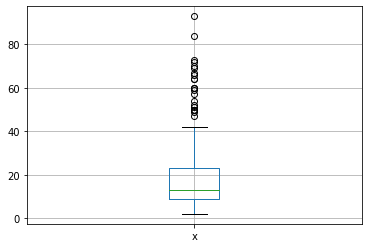

In [ ]:
_, live_data = pd.DataFrame.boxplot(songs_train["live"], return_type='both')
whiskers = [whiskers.get_ydata() for whiskers in live_data["whiskers"]]
whiskers

In [ ]:
from matplotlib.cbook import boxplot_stats
live_outliers = [y for stat in boxplot_stats(songs_train['live']) for y in stat['fliers']]
live_outliers.sort()
print(live_outliers)

[47, 49, 50, 50, 50, 50, 51, 52, 54, 57, 59, 60, 60, 60, 64, 64, 66, 67, 69, 70, 72, 73, 84, 93]


In [ ]:
Q1 = songs_train["live"].quantile(0.25)
Q3 = songs_train["live"].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
upper_whisker = Q3 + (whisker_width*IQR)

songs_train["live"]=songs_train["live"].where(cond=songs_train["live"]<upper_whisker,other=upper_whisker)

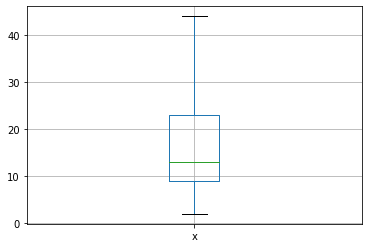

In [ ]:
pd.DataFrame.boxplot(songs_train["live"])

### bpm

In [ ]:
# _, bpm_data = pd.DataFrame.boxplot(songs_train["bpm"], return_type='both')
# whiskers = [whiskers.get_ydata() for whiskers in bpm_data["whiskers"]]
# whiskers

In [ ]:
# bpm_outliers = [y for stat in boxplot_stats(songs_train['bpm']) for y in stat['fliers']]
# bpm_outliers.sort()
# print(bpm_outliers)

In [ ]:
# Q1 = songs_train["bpm"].quantile(0.25)
# Q3 = songs_train["bpm"].quantile(0.75)
# IQR = Q3 - Q1
# whisker_width = 1.5
# upper_whisker = Q3 + (whisker_width*IQR)

# songs_train["bpm"]=songs_train["bpm"].where(cond=songs_train["bpm"]<upper_whisker,other=upper_whisker)
# pd.DataFrame.boxplot(songs_train["bpm"])

### dur

[array([186.,  98.]), array([264., 365.])]

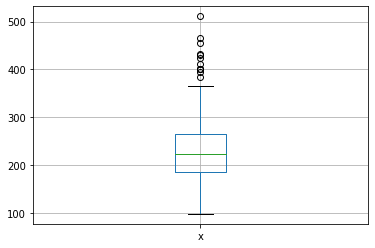

In [ ]:
_, dur_data = pd.DataFrame.boxplot(songs_train["dur"], return_type='both')
whiskers = [whiskers.get_ydata() for whiskers in dur_data["whiskers"]]
whiskers

In [ ]:
dur_outliers = [y for stat in boxplot_stats(songs_train['dur']) for y in stat['fliers']]
dur_outliers.sort()
print(dur_outliers)

[384, 394, 400, 400, 400, 411, 424, 431, 433, 456, 466, 511]


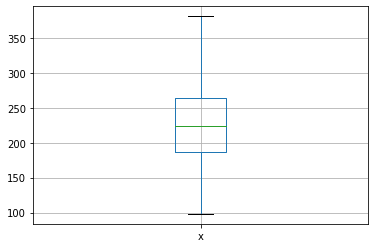

In [ ]:
Q1 = songs_train["dur"].quantile(0.25)
Q3 = songs_train["dur"].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
upper_whisker = Q3 + (whisker_width*IQR)

songs_train["dur"]=songs_train["dur"].where(cond=songs_train["dur"]<upper_whisker,other=upper_whisker)
pd.DataFrame.boxplot(songs_train["dur"])

### spch

In [ ]:
# _, spch_data = pd.DataFrame.boxplot(songs_train["spch"], return_type='both')
# whiskers = [whiskers.get_ydata() for whiskers in spch_data["whiskers"]]
# whiskers

In [ ]:
# spch_outliers = [y for stat in boxplot_stats(songs_train['spch']) for y in stat['fliers']]
# spch_outliers.sort()
# print(spch_outliers)

In [ ]:
# Q1 = songs_train["spch"].quantile(0.20)
# Q3 = songs_train["spch"].quantile(0.80)
# IQR = Q3 - Q1
# whisker_width = 1.5
# upper_whisker = Q3 + (whisker_width*IQR)

# songs_train["spch"]=songs_train["spch"].where(cond=songs_train["spch"]<upper_whisker,other=upper_whisker)
# pd.DataFrame.boxplot(songs_train["spch"])

## Combine the taining data and testing data
If we process training data and testing data seperately, there will be problems after converting categorical data to matrix or scaling. So we need to combine them together first.

In [ ]:
songs_train_features = songs_train.drop("top genre",axis=1)
songs_train_labels = songs_train["top genre"]

In [ ]:
songs_concat = pd.concat(objs=[songs_train_features, songs_test], ignore_index=True)
songs_concat

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Connie Francis,1996,107,31,45,-8,13.0,28,150.0,75,3,44
1,Bee Gees,1979,105,36,63,-9,13.0,67,245.0,11,3,77
2,Barbra Streisand,1980,170,28,47,-16,13.0,33,232.0,25,3,67
3,Elton John,1973,121,47,56,-8,15.0,40,193.0,45,3,63
4,Bruno Mars,2010,110,56,71,-7,12.0,23,223.0,15,6,74
...,...,...,...,...,...,...,...,...,...,...,...,...
545,50 Cent,2005,125,57,61,-8,38.0,76,209.0,3,47,78
546,O-Zone,2010,130,89,67,-6,10.0,80,215.0,4,3,44
547,The Notorious B.I.G.,1994,84,58,78,-7,14.0,76,253.0,43,27,74
548,Village People,1978,127,97,72,-5,12.0,73,287.0,6,14,71


## Handling Categorical Attributes

### "top genre" column

Use "factory()" to find out the range of values we need to encode in "top genre" column.

In [ ]:
songs_genre_encoded, songs_genre_categories = songs_train["top genre"].factorize()
songs_genre_encoded

array([ 0,  0,  0,  1,  2,  3,  4,  0,  4,  1,  5,  5,  6,  5,  7,  8,  3,
        9,  1,  0, 10,  4, 11, 12, 13, 14,  3,  9,  9, 13, 15,  0, 16,  9,
        3,  9, 10,  0,  8,  0,  9, 17,  3, 18, 19,  2, 20, 21, 22,  0,  3,
        5,  3, 23, 19, 24,  3, 23,  9, 25,  1,  9,  9,  0,  0, 18,  0,  3,
        0,  9, 26,  3,  0, 27,  9, 12, 16,  9,  0, 28,  2,  9, 29, 30, 19,
        9, 31, 32, 19,  5,  0,  3,  1, 20,  3,  3,  0,  3,  5, 10,  0, 33,
       34,  9, 21, 35,  7, 36,  3, 37,  9,  0,  1, 22,  9,  0, 30, 38,  9,
       39,  3,  9, 40, 19, 16, 31,  3,  0,  0,  9,  3, 10,  3, 23,  0,  9,
        0, 41,  4, 13,  1, 42, 43,  3,  0, 44,  9,  3, 12,  3,  0,  3,  9,
        3,  3,  1,  9,  0, 21, 21,  3,  3, 45,  0, 46,  3, 28,  5,  0, 19,
        0, 15,  3,  9, 11,  1,  9, 47, 12,  3,  4,  9,  3, 10,  0, 15, 46,
       21, 48, 15,  0, 39, 28,  9,  0,  9,  9, 49, 50,  1, 22,  3, 10,  3,
        3, 19, 51, 13, 52, 13,  0,  0, 25, 44, 53,  3,  0,  0,  3,  4, 44,
       54,  3, 55, 19, 10

In [ ]:
songs_genre_categories

Index(['adult standards', 'glam rock', 'pop', 'album rock', 'boy band',
       'brill building pop', 'rock-and-roll', 'country rock', 'canadian pop',
       'dance pop', 'europop', 'bebop', 'art rock', 'disco', 'blues',
       'barbadian pop', 'deep adult standards', 'deep house', 'atl hip hop',
       'dance rock', 'disco house', 'bubblegum dance', 'classic soul',
       'classic uk pop', 'east coast hip hop', 'doo-wop', 'britpop',
       'british blues', 'soft rock', 'australian talent show', 'art pop',
       'british soul', 'british invasion', 'belgian pop', 'big room',
       'german dance', 'italian pop', 'british folk', 'brit funk',
       'chicago soul', 'neo mellow', 'british comedy', 'hip hop',
       'new wave pop', 'eurodance', 'detroit hip hop', 'classic rock',
       'uk garage', 'afrobeat', 'r&b', 'chicago rap', 'classic danish pop',
       'british dance band', 'drone folk', 'permanent wave', 'merseybeat',
       'g funk', 'blues rock', 'celtic rock', 'bow pop', 'austra

Use "OneHotEncode()" to transform the column into an matrix with each category represented as a binary attribute.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
genre_encoder = OneHotEncoder(handle_unknown='ignore')
songs_train_genre_1hot = genre_encoder.fit_transform(songs_genre_encoded.reshape(-1,1))

### Doing the same to "artist" column


In [ ]:
songs_art_encoded, songs_art_categories = songs_concat["artist"].factorize()
songs_art_encoded

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   3,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  14,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  25,  48,
        49,  50,  51,  52,  53,  54,  55,  56,   3,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,   3,  88,  89,  90,  91,  15,  92,  93,  94,  95,  96,  97,
        98,  99,  13, 100, 101, 102, 103, 104,   3, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117,  87, 118, 118, 119,
       120,  35, 121, 122, 123, 124, 125, 126,  20, 127,  17, 128, 129,
       120,   2, 130, 131,  40, 132, 133,  64, 134, 135, 136, 137,  17,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152,  29, 153,  55, 154,  17,  27, 155, 156, 157, 15

In [ ]:
songs_art_categories

Index(['Connie Francis', 'Bee Gees', 'Barbra Streisand', 'Elton John',
       'Bruno Mars', 'The Guess Who', 'Boyz II Men', 'Timi Yuro', 'Blue',
       'The Beau Brummels',
       ...
       'Frank Zappa', 'Take That', 'Europe', 'Patsy Cline', 'Peter Gabriel',
       'SWV', 'SNAP!', 'Jan Hammer', 'O-Zone', 'Village People'],
      dtype='object', length=394)

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
songs_concat_art_1hot = encoder.fit_transform(songs_art_encoded.reshape(-1,1))
songs_concat_art_1hot

<550x394 sparse matrix of type '<class 'numpy.float64'>'
	with 550 stored elements in Compressed Sparse Row format>

## Add some useful columns

In [ ]:
# songs_concat["age"] = 2023-songs_concat["year"]
# songs_concat.head()

In [ ]:
songs_concat["beats_per_song"] = songs_concat['bpm']*songs_concat['dur']/60
songs_concat.head()

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,beats_per_song
0,Connie Francis,1996,107,31,45,-8,13.0,28,150.0,75,3,44,267.500000
1,Bee Gees,1979,105,36,63,-9,13.0,67,245.0,11,3,77,428.750000
2,Barbra Streisand,1980,170,28,47,-16,13.0,33,232.0,25,3,67,657.333333
3,Elton John,1973,121,47,56,-8,15.0,40,193.0,45,3,63,389.216667
4,Bruno Mars,2010,110,56,71,-7,12.0,23,223.0,15,6,74,408.833333


And we think dance columns don't have much relationship with genre, so we drop them as well.

In [ ]:
songs_concat = songs_concat.drop(["dnce", 'year', 'bpm'], axis=1)

## Feature scaling

Machine Learning algorithms often don’t perform well when the numerical attributes have very different scales.
But before scale the data, we need to extract all the numeric columns first.

In [ ]:
songs_numeric = songs_concat.drop(['artist'], axis=1)

numeric_attribs = list(songs_numeric)
numeric_attribs

['nrgy', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'beats_per_song']

Use "StandardScaler()" to transform the numeric values.

In [ ]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
songs_numeric[numeric_attribs] = std_scaler.fit_transform(songs_numeric[numeric_attribs])

songs_numeric

,nrgy,dB,live,val,dur,acous,spch,pop,beats_per_song
0,-1.332393,0.220686,-0.357361,-1.286741,-1.288740,1.466667,-0.482064,-1.411234,-1.167114
1,-1.107644,-0.052686,-0.357361,0.310978,0.301114,-0.712042,-0.482064,1.209650,-0.150281
2,-1.467242,-1.966295,-0.357361,-1.081905,0.083555,-0.235449,-0.482064,0.415443,1.291153
3,-0.613196,0.220686,-0.195058,-0.795135,-0.569122,0.445397,-0.482064,0.097760,-0.399575
4,-0.208649,0.494059,-0.438512,-1.491577,-0.067063,-0.575872,0.035105,0.971388,-0.275874
...,...,...,...,...,...,...,...,...,...
545,-0.163699,0.220686,1.671422,0.679682,-0.301357,-0.984380,7.103079,1.289071,-0.108241
546,1.274693,0.767432,-0.600815,0.843551,-0.200945,-0.950338,-0.482064,-1.411234,0.083565
547,-0.118749,0.494059,-0.276210,0.679682,0.434996,0.377313,3.655286,0.971388,-0.620389
548,1.634291,1.040804,-0.438512,0.556781,1.003997,-0.882253,1.414222,0.733126,0.976801


## Recombining the catagorical and numerical data

In [ ]:
enc_art = pd.DataFrame(songs_concat_art_1hot.toarray())

enc_art.columns = songs_art_categories
enc_art.index = songs_concat.index

In [ ]:
songs_concat_prepared = songs_numeric.join(other=enc_art, lsuffix='_')
songs_concat_prepared

,nrgy,dB,live,val,dur,acous,spch,pop,beats_per_song,Connie Francis,...,Frank Zappa,Take That,Europe,Patsy Cline,Peter Gabriel,SWV,SNAP!,Jan Hammer,O-Zone,Village People
0,-1.332393,0.220686,-0.357361,-1.286741,-1.288740,1.466667,-0.482064,-1.411234,-1.167114,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.107644,-0.052686,-0.357361,0.310978,0.301114,-0.712042,-0.482064,1.209650,-0.150281,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.467242,-1.966295,-0.357361,-1.081905,0.083555,-0.235449,-0.482064,0.415443,1.291153,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.613196,0.220686,-0.195058,-0.795135,-0.569122,0.445397,-0.482064,0.097760,-0.399575,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.208649,0.494059,-0.438512,-1.491577,-0.067063,-0.575872,0.035105,0.971388,-0.275874,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,-0.163699,0.220686,1.671422,0.679682,-0.301357,-0.984380,7.103079,1.289071,-0.108241,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546,1.274693,0.767432,-0.600815,0.843551,-0.200945,-0.950338,-0.482064,-1.411234,0.083565,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
547,-0.118749,0.494059,-0.276210,0.679682,0.434996,0.377313,3.655286,0.971388,-0.620389,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548,1.634291,1.040804,-0.438512,0.556781,1.003997,-0.882253,1.414222,0.733126,0.976801,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Drop one categorical column to avoid the dummy variable trap

In [ ]:
# songs_concat_prepared.drop('Connie Francis', axis=1, inplace=True)

## Seperate the training data and testing data

In [ ]:
songs_train_prepared_features = songs_concat_prepared.iloc[:437]
songs_train_prepared_features

,nrgy,dB,live,val,dur,acous,spch,pop,beats_per_song,Connie Francis,...,Frank Zappa,Take That,Europe,Patsy Cline,Peter Gabriel,SWV,SNAP!,Jan Hammer,O-Zone,Village People
0,-1.332393,0.220686,-0.357361,-1.286741,-1.288740,1.466667,-0.482064,-1.411234,-1.167114,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.107644,-0.052686,-0.357361,0.310978,0.301114,-0.712042,-0.482064,1.209650,-0.150281,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.467242,-1.966295,-0.357361,-1.081905,0.083555,-0.235449,-0.482064,0.415443,1.291153,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.613196,0.220686,-0.195058,-0.795135,-0.569122,0.445397,-0.482064,0.097760,-0.399575,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.208649,0.494059,-0.438512,-1.491577,-0.067063,-0.575872,0.035105,0.971388,-0.275874,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,-1.736940,-2.239668,-0.600815,-1.778347,-0.217681,2.045387,-0.309674,-1.331813,-1.054658,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
433,0.915095,-1.146177,0.454152,1.499026,-1.338946,0.615609,-0.482064,-0.934710,-0.567419,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,-0.253598,0.220686,0.210698,0.065175,1.037467,-0.303534,1.414222,1.209650,2.248815,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,1.184794,1.040804,-0.925420,1.171288,-0.602593,-0.916296,0.379884,0.018339,0.458243,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
songs_test_prepared_features = songs_concat_prepared.iloc[-113:]
songs_test_prepared_features

,nrgy,dB,live,val,dur,acous,spch,pop,beats_per_song,Connie Francis,...,Frank Zappa,Take That,Europe,Patsy Cline,Peter Gabriel,SWV,SNAP!,Jan Hammer,O-Zone,Village People
437,1.454492,1.587550,4.674020,0.597748,-0.234416,-1.052465,2.103780,0.812546,0.593505,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
438,-0.972794,-1.692922,-0.519663,-1.860282,1.087673,-0.201407,-0.482064,-0.219923,2.086963,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,-0.658146,0.494059,-0.438512,-1.696413,-0.803416,0.207101,-0.482064,1.130229,-1.649939,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,1.409543,-0.052686,1.590270,-0.262562,-0.184210,-0.882253,-0.309674,-0.934710,0.029124,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
441,-0.658146,-0.872804,0.291850,-1.040938,-1.238534,-0.473745,-0.482064,-1.411234,-1.004736,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,-0.163699,0.220686,1.671422,0.679682,-0.301357,-0.984380,7.103079,1.289071,-0.108241,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546,1.274693,0.767432,-0.600815,0.843551,-0.200945,-0.950338,-0.482064,-1.411234,0.083565,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
547,-0.118749,0.494059,-0.276210,0.679682,0.434996,0.377313,3.655286,0.971388,-0.620389,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548,1.634291,1.040804,-0.438512,0.556781,1.003997,-0.882253,1.414222,0.733126,0.976801,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
songs_train_prepared_labels = pd.DataFrame(songs_train_genre_1hot.toarray())
songs_train_prepared_labels.columns = songs_genre_categories
songs_train_prepared_labels.index = songs_train_prepared_features.index

## Visualize the data

To see relationships between attributes.

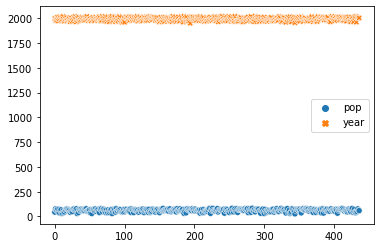

In [ ]:
from seaborn.relational import scatterplot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# map_data = songs_train.drop(['artist', 'top genre'], axis=1)
# scatter_matrix(map_data, figsize=(20,10))
# plt.show()

pop_year = songs_train.loc[:, ['pop', 'year']]
scatterplot(data=pop_year)

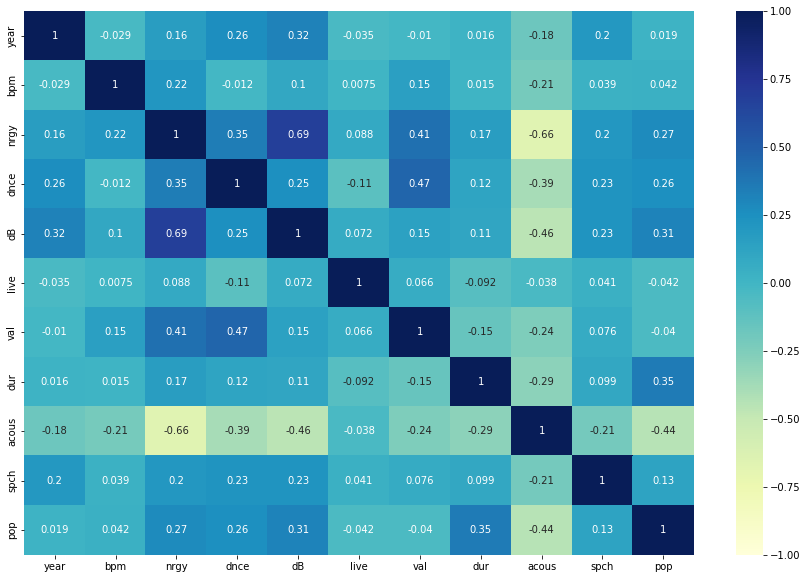

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
map_data = songs_train.drop(['artist', 'top genre'], axis=1)
# sns.heatmap(songs_concat.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
sns.heatmap(map_data.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

In [ ]:
songs_concat.corr()

,nrgy,dB,live,val,dur,acous,spch,pop,beats_per_song
nrgy,1.000000,0.704014,0.128304,0.435053,0.159778,-0.669269,0.207584,0.276317,0.224051
dB,0.704014,1.000000,0.085560,0.193211,0.095569,-0.480610,0.227115,0.316572,0.107873
live,0.128304,0.085560,1.000000,0.059740,-0.062412,-0.062899,0.088318,-0.026305,-0.050210
val,0.435053,0.193211,0.059740,1.000000,-0.142590,-0.259382,0.105290,-0.030904,-0.059150
dur,0.159778,0.095569,-0.062412,-0.142590,1.000000,-0.275043,0.078754,0.361253,0.772448
acous,-0.669269,-0.480610,-0.062899,-0.259382,-0.275043,1.000000,-0.183892,-0.440504,-0.318373
spch,0.207584,0.227115,0.088318,0.105290,0.078754,-0.183892,1.000000,0.146899,0.084556
pop,0.276317,0.316572,-0.026305,-0.030904,0.361253,-0.440504,0.146899,1.000000,0.318087
beats_per_song,0.224051,0.107873,-0.050210,-0.059150,0.772448,-0.318373,0.084556,0.318087,1.000000


In [ ]:
# pd.DataFrame.boxplot(songs_train["dnce"])
# print(list(songs_train_prepared_labels))
# pd.DataFrame.boxplot(songs_train["bpm"])

In [ ]:
# train_map = songs_train_prepared_features.join(other=songs_train_prepared_labels, lsuffix="_")

# attributes = ['dnce', 'dance pop', 'dance rock', 'bubblegum dance', 'glam metal', 'german dance', 'bubblegum dance', 'rock-and-roll', 'country rock', 'disco', 'blues']
# map_data = train_map[attributes]


## Select and train a model

### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(songs_train_prepared_features, songs_train_prepared_labels)

predicted = model.predict(songs_test_prepared_features)
predicted

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Naive Bayes

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()

# import numpy as np
# songs_train_prepared_labels = np.ravel(songs_train_prepared_labels)
# songs_train_prepared_features
# model.fit(songs_train_prepared_features, songs_train_prepared_labels)

# predicted = model.predict(songs_test_prepared_features)

### KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=1)
# model.fit(songs_train_prepared_features, songs_train_prepared_labels)

# predicted = model.predict(songs_test_prepared_features)
# predicted

## Inverse and get csv

In [ ]:
prediction = genre_encoder.inverse_transform(predicted)

prediction_label = songs_genre_categories[prediction]
# print(prediction_label)

<ipython-input-182-fee5d0582e7d>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  prediction_label = songs_genre_categories[prediction]


In [ ]:
pre_result = pd.DataFrame(data=prediction_label, columns=[ "top genre"], index=testing['Id'])
pre_result.to_csv('prediction.csv')
pre_result

,top genre
Id,
454,bow pop
455,glam rock
456,adult standards
457,art rock
458,chanson
...,...
563,east coast hip hop
564,dance pop
565,dance pop


## For testing

In [ ]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(songs_train_prepared_features, songs_train_prepared_labels, test_size = 0.25)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, Y_train)

predicted = model.predict(X_test)

from sklearn import metrics
# print(metrics.classification_report(Y_test, predicted))
# print(metrics.accuracy_score(Y_test, predicted))
model.feature_importances_

array([0.08766699, 0.05648365, 0.0755668 , 0.12436891, 0.10148684,
       0.08938131, 0.06391861, 0.10034291, 0.07089552, 0.        ,
       0.        , 0.        , 0.02066625, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00331744,
       0.        , 0.00739908, 0.        , 0.01061531, 0.00331744,
       0.        , 0.        , 0.        , 0.        , 0.00331744,
       0.        , 0.        , 0.        , 0.01084066, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01684678,
       0.00683067, 0.        , 0.        , 0.        , 0.        ,
       0.00331744, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# from sklearn.linear_model import LogisticRegression

# LogReg = LogisticRegression(random_state=2)

# LogReg.fit(X_train, Y_train)
# predicted = LogReg.predict(X_test)

# from sklearn import metrics
# print(metrics.accuracy_score(Y_test, predicted))